In [233]:
import numpy 
from sklearn.neural_network import MLPRegressor 
from glob import glob
import pickle
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import pandas as pd

In [194]:
from glob import glob
import pickle
import numpy as np

ROOT_PATH = "C:/Users/ly264/Desktop/CSE151b_final_project/"

cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
splits = ["train", "test"]

def get_city_trajectories(city="palo-alto", split="train", normalized=False):

    
    outputs = None
    
    if split=="train":
        f_in = ROOT_PATH + split + "/" + city + "_inputs"
        inputs = pickle.load(open(f_in, "rb"))
        n = len(inputs)
        inputs = np.asarray(inputs)[:int(n)]
        
        f_out = ROOT_PATH + split + "/" + city + "_outputs"
        outputs = pickle.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)[:int(n)]      
    
    else:
        f_in = ROOT_PATH + split + "/" + city + "_inputs"
        inputs = pickle.load(open(f_in, "rb"))
        n = len(inputs)
        inputs = np.asarray(inputs)

    return inputs, outputs

class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, city: str, split:str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.transform = transform

        self.inputs, self.outputs = get_city_trajectories(city=city, split=split, normalized=False)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):

        data = (self.inputs[idx], self.outputs[idx])
            
        if self.transform:
            data = self.transform(data)

        return data

# intialize a dataset
city = 'palo-alto' 
split = 'train'
train_dataset  = ArgoverseDataset(city = city, split = split)

In [229]:
def get_csv(city):
    
    #get data ready for this city
    train_dataset = ArgoverseDataset(city, split = "train")
    output = [d[1].flatten() for d in train_dataset]
    in_put = [d[0].flatten() for d in train_dataset]
    
    #train the model for this city
    model = MLPRegressor(activation="relu", solver="adam", early_stopping=True, validation_fraction = 0.2,
    learning_rate="adaptive", max_iter=400,alpha=0.001,hidden_layer_sizes = (32,64,64,128))
    
    model.fit(in_put,output)
    
    #get the predictoin 
    test_input,y =get_city_trajectories(city, "test", normalized=False)
    x = [ d.flatten() for d in test_input]
    y= model.predict(x)
    return y

In [230]:
# get all the prediction 
final =[]
for city in cities:
    x = get_csv(city)
    for ele in x:
        final.append(ele)


In [231]:
len(final)

29843

In [245]:
np.savetxt("prediction.csv", 
           final,
           delimiter =", ", 
           fmt ='% s')

In [234]:
df = pd.read_csv('C:/Users/ly264/Desktop/CSE151b_final_project/sample_submission.csv')

In [244]:
final

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

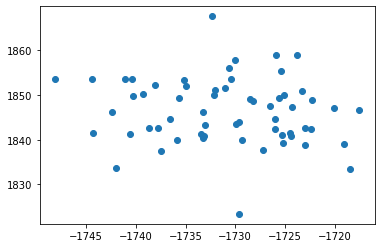

In [176]:
import matplotlib.pyplot as plt
y_show = y[677]
x_res = []
y_res = []
for i in range(0,120,2):
    x_res.append(y_show[i])
    y_res.append(y_show[i+1])
plt.scatter(x_res, y_res)
plt.show


In [249]:
    #get data ready for this city
    train_dataset = ArgoverseDataset("austin", split = "train")
    output = [d[1].flatten() for d in train_dataset]
    in_put = [d[0].flatten() for d in train_dataset]
    
    #train the model for this city
    model = MLPRegressor(activation="relu", solver="adam", early_stopping=False,
    learning_rate="adaptive", max_iter=400,alpha=0.001,hidden_layer_sizes = (32,64,64,128))
    
    model.fit(in_put,output)
    

    

MLPRegressor(alpha=0.001, hidden_layer_sizes=(32, 64, 64, 128),
             learning_rate='adaptive', max_iter=400)

In [254]:
import matplotlib.pyplot as plt

In [262]:
li = np.log((model.loss_curve_))

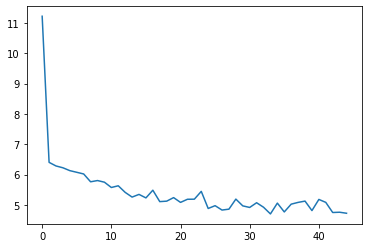

In [263]:
plt.plot(li)